<a href="https://colab.research.google.com/github/riteshk2311/machinelearning/blob/master/Classification_1607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SGD CLASSIFIER

In [ ]:
from sklearn import datasets

In [ ]:
mnist=datasets.fetch_openml("mnist_784")

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
import numpy as np
mnist.target=mnist.target.astype(np.int8) #to convert string into int 

In [ ]:
x=mnist.data
y=mnist.target


In [ ]:
y.shape

(70000,)

In [ ]:
y[7]

3

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
some_digit=x[7]
some_digit_image=some_digit.reshape(28,28) #split the x into 28*28

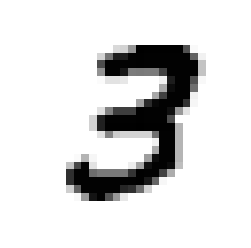

In [ ]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)#cmap=matplotlib.cm.binary for black and white
plt.axis("off") #for axis (not to disply)
plt.show()

In [ ]:
x_train,x_test=x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]
shuffle_index=np.random.permutation(len(x_train))
x_train=x_train[shuffle_index]
y_train=y_train[shuffle_index]

In [ ]:
y_train_3=(y_train==3)
y_test_3=(y_test==3)

In [ ]:
y_train_3

array([False, False, False, ...,  True, False, False])

In [ ]:
class SGDClassifier:
  def __init__(self,y=5,random_state=None):
    print(random_state,y)
  def fit(self,x,y):
    print("Model is Classified")

In [ ]:
sgd_clf=SGDClassifier(random_state=7)

7 5


In [ ]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=0)
sgd_clf.fit(x_train,y_train_3)
sgd_clf.predict([x[9]])

array([False])

In [ ]:
y_pred=sgd_clf.predict(x_train)

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_train_3,y_pred)
#cm.metrices.accuracy_score(y_train_3,y_pred)
cm

array([[51920,  1949],
       [  571,  5560]])

In [ ]:
metrics.accuracy_score(y_train_3,y_pred)

0.958

##CROSS VALIDATE

In [ ]:
from sklearn.model_selection import cross_val_predict


In [ ]:
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_3,cv=3) #cv=fold


In [ ]:
len(y_train_pred)

60000

In [ ]:
metrics.accuracy_score(y_train_3,y_train_pred)

0.9627166666666667

*DECISION FUNCTION*

In [ ]:
y_score=sgd_clf.decision_function([x[4]])
y_score

array([-7829.47019449])

In [ ]:
y_score=cross_val_predict(sgd_clf,x_train,y_train_3,cv=3,) #cv=fold


In [ ]:
len(y_train)

In [ ]:
y_score

RECIEVER OPERATING CURVE(ROC)

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

#MULTI CLASS CLASSIFIER